# Zomato Data Analysis

In [31]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#creating a dataframe
df=pd.read_csv(r"C:\Users\Kush\Documents\My Projects\Zomato Data Analysis\Zomato data analysis.csv")
print(df.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [33]:
#converting the data type of "rate" column to float and removing the denominator
def rateconvert(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply(rateconvert)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [34]:
#summary to detect any potential data gaps that must be addressed like presence in any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of restaurant')

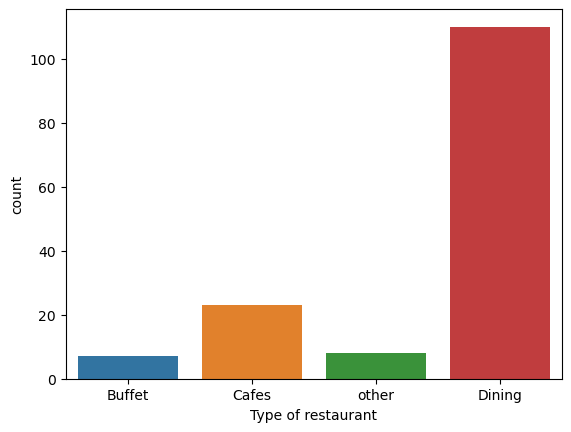

In [35]:
#exploring the listed_in (type) column
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of restaurant")

Conclusion : The majority of the restaurants fall into the dining category.

Text(0, 0.5, 'Votes')

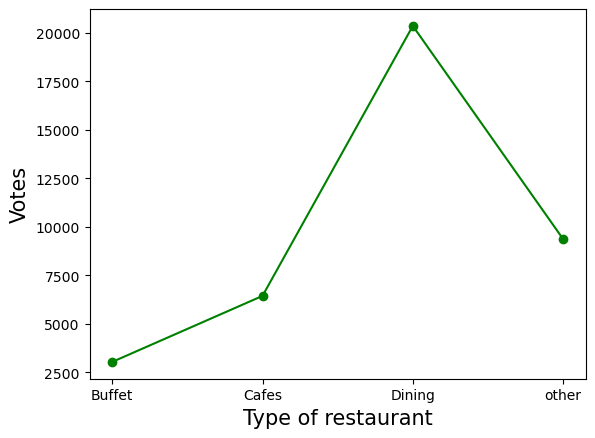

In [36]:
#Restaurant type preference
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
res = pd.DataFrame({'votes':grouped_data})
plt.plot(res, color="green", marker="o")
plt.xlabel("Type of restaurant", size=15)
plt.ylabel("Votes", size=15)

Conclusion : Dining restaurants are preferred by a larger number of individuals.

In [37]:
#determining the restaurant's name that received maximum votes
max_votes = df['votes'].max()
restaurant_votes = df.loc[df['votes']==max_votes,'name']
print("Restaurant with maximum votes : ")
print(restaurant_votes)

Restaurant with maximum votes : 
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

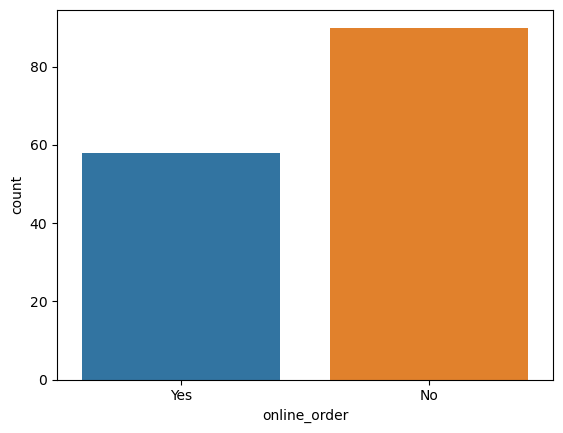

In [38]:
#exploring the online_order column
sns.countplot(x=df['online_order'])

Conclusion : Majority of the restaurants do not accept online orders.

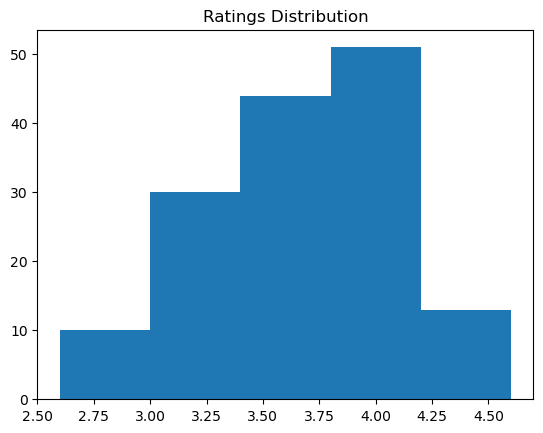

In [39]:
#Restaurant rating
plt.hist(df['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()

Conclusion : Majority of restaurants received ratings ranging from 3.5 to 4.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

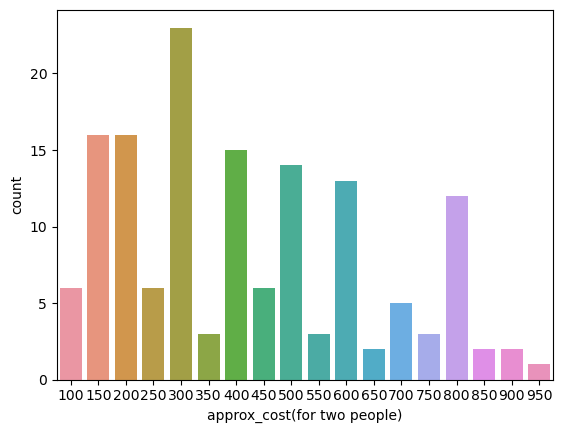

In [40]:
#exploring the approx_cost(for two people) column
couple = df['approx_cost(for two people)']
sns.countplot(x=couple)

Conclusion : Majority of couples prefer restaurants with an approximate cost of 300 rupees.

<Axes: xlabel='online_order', ylabel='rate'>

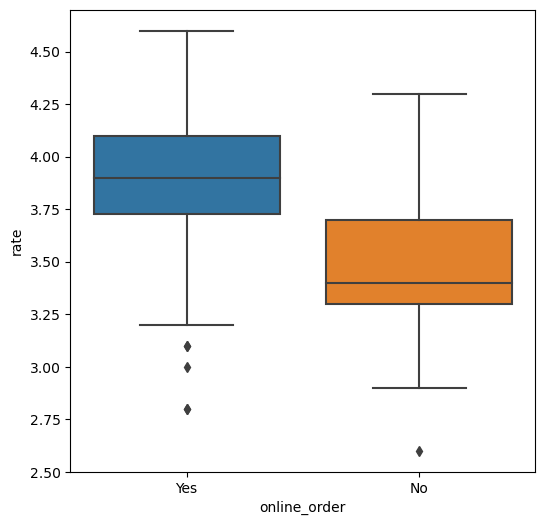

In [41]:
#examining whether online orders receive higher ratings than offline orders
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)

Conclusion : Online orders received higher ratings in comparison to offline orders.

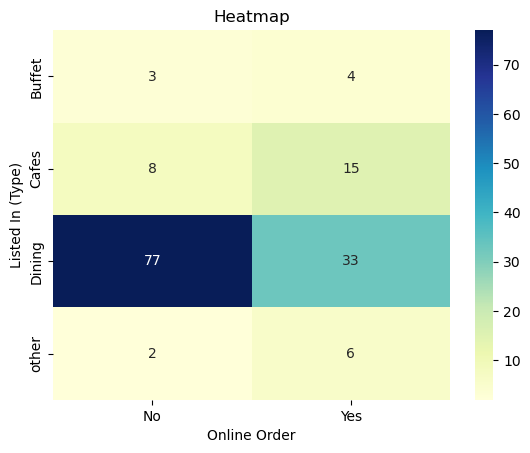

In [44]:
#Customer preference
table = df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(table,annot=True,cmap='YlGnBu',fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

Conclusion : Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders.
This suggests that clients prefer to place orders in person at restaurants but prefer online ordering at cafes.